    У даній роботі на основі даних по 615 спостреженнях за 10 ознаками спробуємо побудувати моделі їхньої класифікації. Для цього розглянемо їхню класифікацію за ознакою Category.
    У даній роботі розглянемо класифікацію з використанням моделі логістичної регресії, методу опорних векторів, k-найближчих сусідів, байєсової класифікації, моделі дерева рішень та випадкового лісу, а також нейронних мереж.
    Для кожної розглянутої моделі буде розраховуватися метрика Accuracy та будуватися матриця невідповідностей.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df=pd.read_csv('Control Classification&Clustering (Tomilovych, EC-61).csv', sep=';', decimal=',')
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,3.23,106.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,4.80,74.0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,5.20,86.0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,4.74,80.0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,6.30,55.7,1
611,64,f,24.0,102.8,2.9,44.4,20.0,3.02,63.0,1
612,64,f,29.0,87.3,3.5,99.0,48.0,3.63,66.7,1
613,46,f,33.0,NaN,39.0,62.0,20.0,4.20,52.0,1


    Для початку проведемо попередню обробку даних, а саме кодування якісних змінних.

In [3]:
# Checking number of levels of categorical features
print('Sex: '+str(df['Sex'].unique()))
print('Category: '+str(df['Category'].unique()))

Sex: ['m' 'f']
Category: [0 1]


In [4]:
# Encoding categorical feature 'Sex'
from sklearn.preprocessing import LabelEncoder
df[['Sex']]=LabelEncoder().fit_transform(df[['Sex']])

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [5]:
# Descriptive Statistics
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,5.368099,81.287805,0.133333
std,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,1.132728,49.756166,0.340211
min,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.430000,8.000000,0.000000
25%,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,4.610000,67.000000,0.000000
50%,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,5.300000,77.000000,0.000000
75%,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,6.060000,88.000000,0.000000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,9.670000,1079.100000,1.000000


    Далі перевіримо розподіл ознак за нормальним законом.

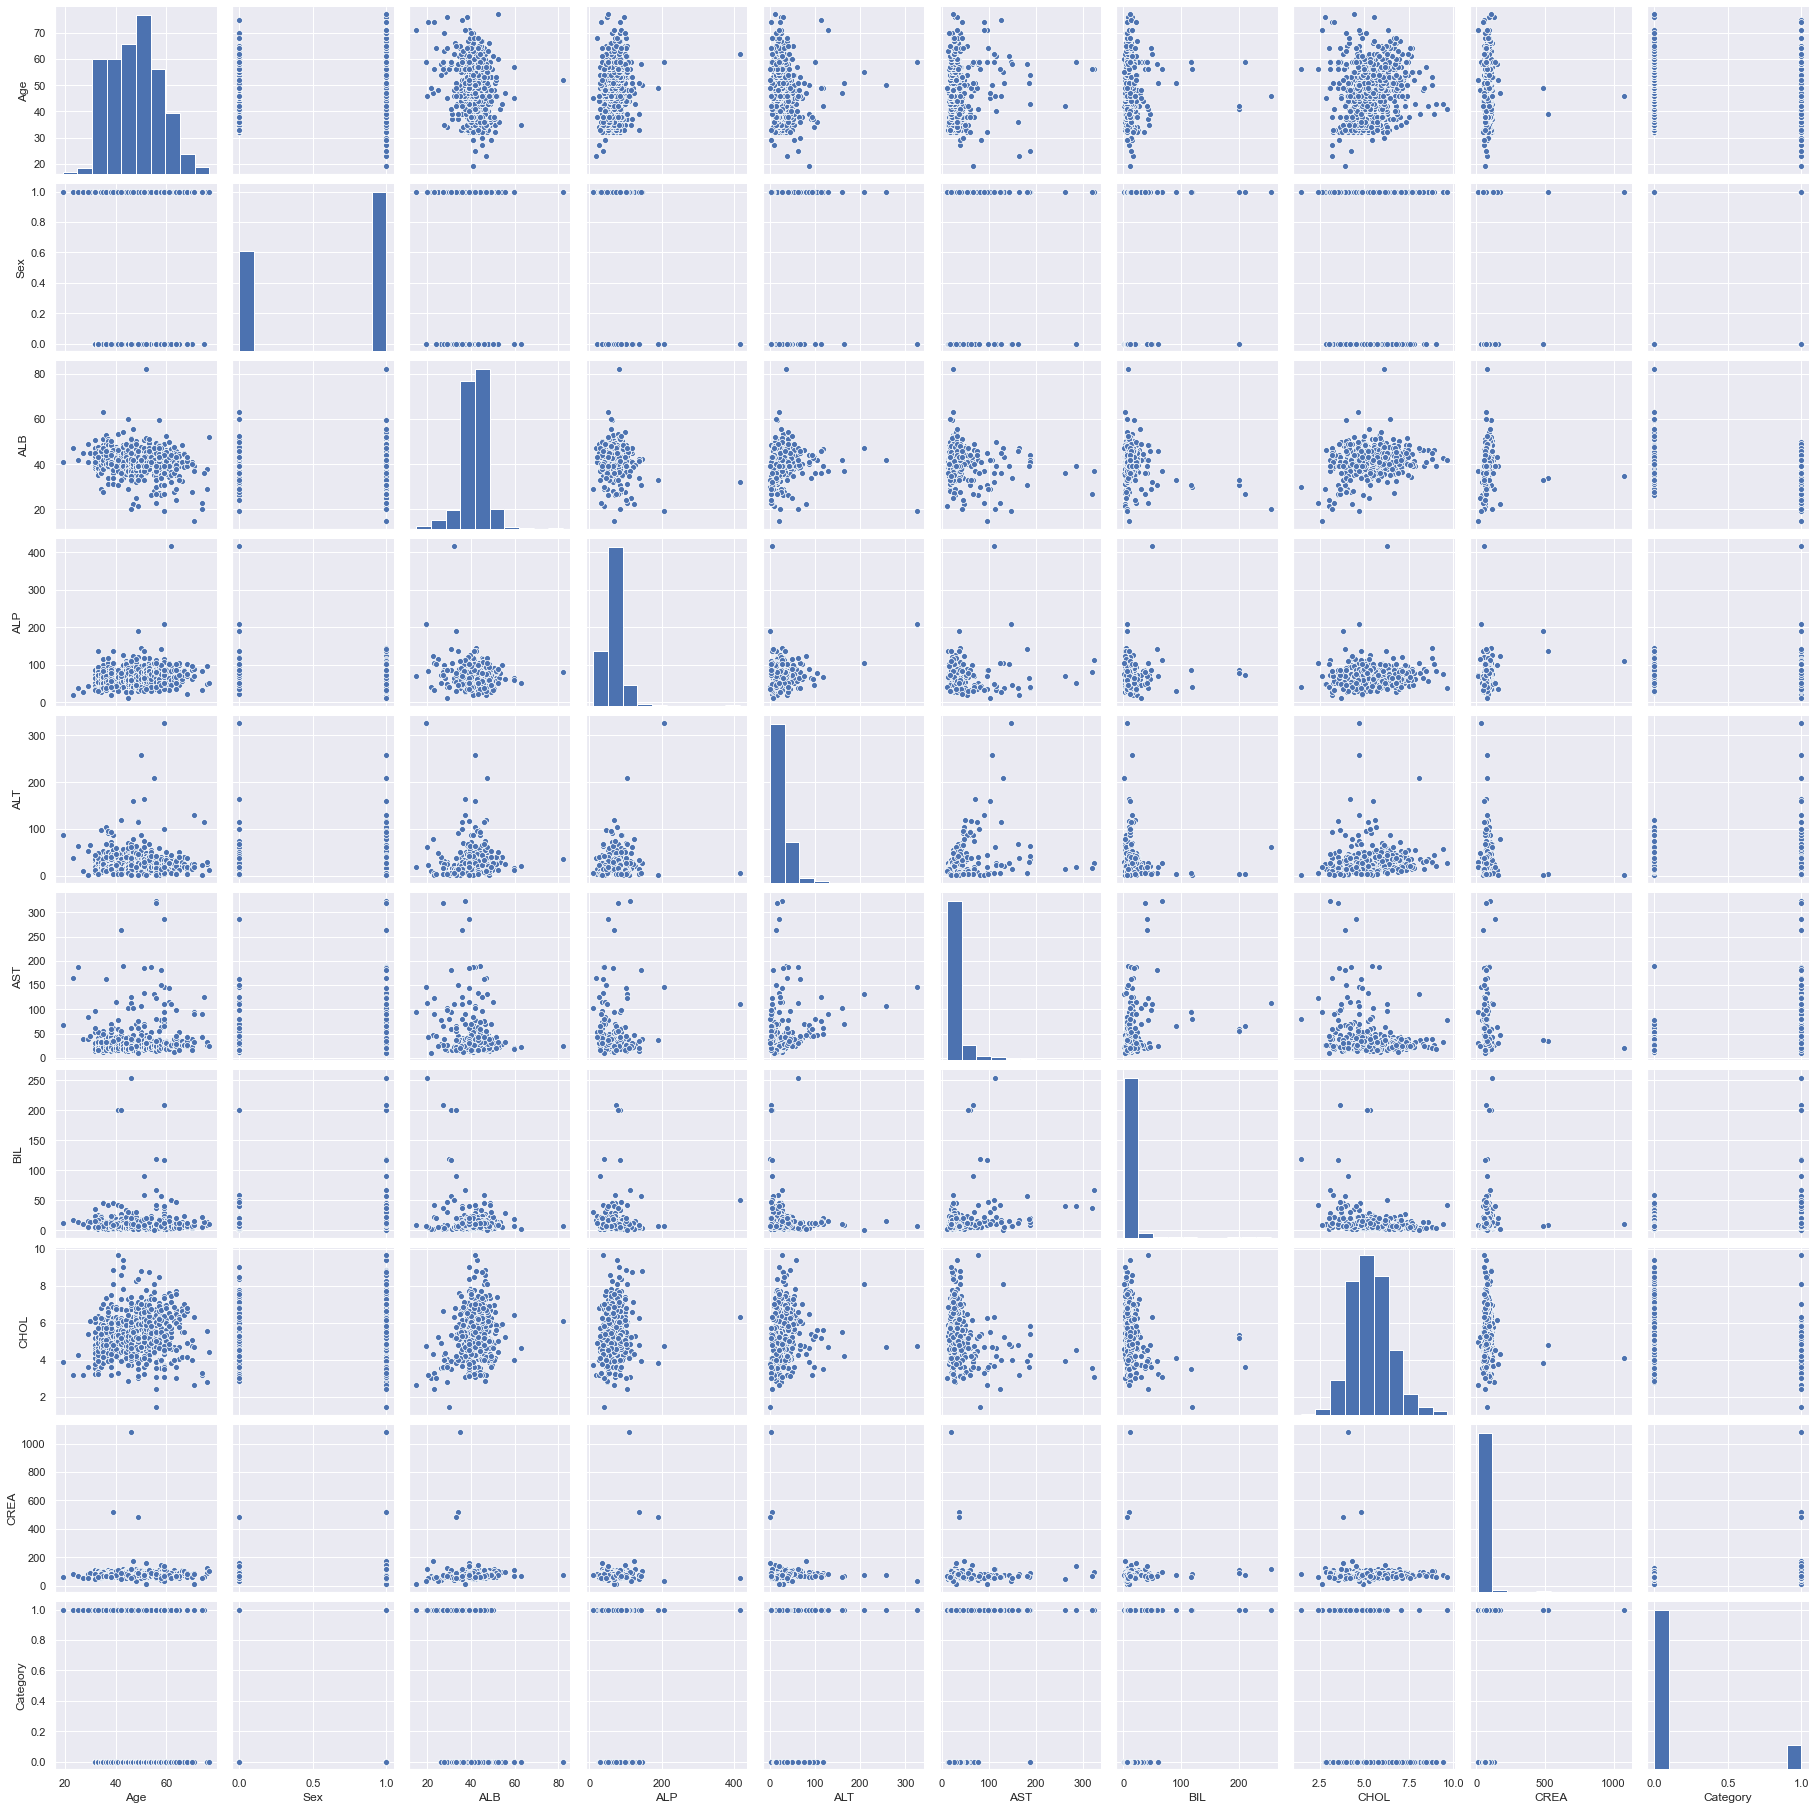

In [6]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

    Частина ознак приймають булеві значення, частина розподілена по нормальному закону, а частина - ні. Для останніх проведеом логарифмування та перевіримо розподіл логарифмованих ознак.

In [7]:
# Log Transformations for Skewed Distributions
df_old=df
df[['ALT','AST', 'BIL', 'CREA']] = np.log(df[['ALT','AST', 'BIL', 'CREA']])
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,0.613008,41.620195,68.283920,3.127743,3.368057,2.079784,5.368099,4.346467,0.133333
std,10.055105,0.487458,5.780629,26.028315,0.660515,0.504072,0.696324,1.132728,0.280440,0.340211
min,19.000000,0.000000,14.900000,11.300000,-0.105361,2.360854,-0.223144,1.430000,2.079442,0.000000
25%,39.000000,0.000000,38.800000,52.500000,2.797281,3.072693,1.667707,4.610000,4.204693,0.000000
50%,47.000000,1.000000,41.950000,66.200000,3.135494,3.254243,1.987874,5.300000,4.343805,0.000000
75%,54.000000,1.000000,45.200000,80.100000,3.498777,3.493473,2.415914,6.060000,4.477337,0.000000
max,77.000000,1.000000,82.200000,416.600000,5.784748,5.780744,5.537334,9.670000,6.983883,1.000000


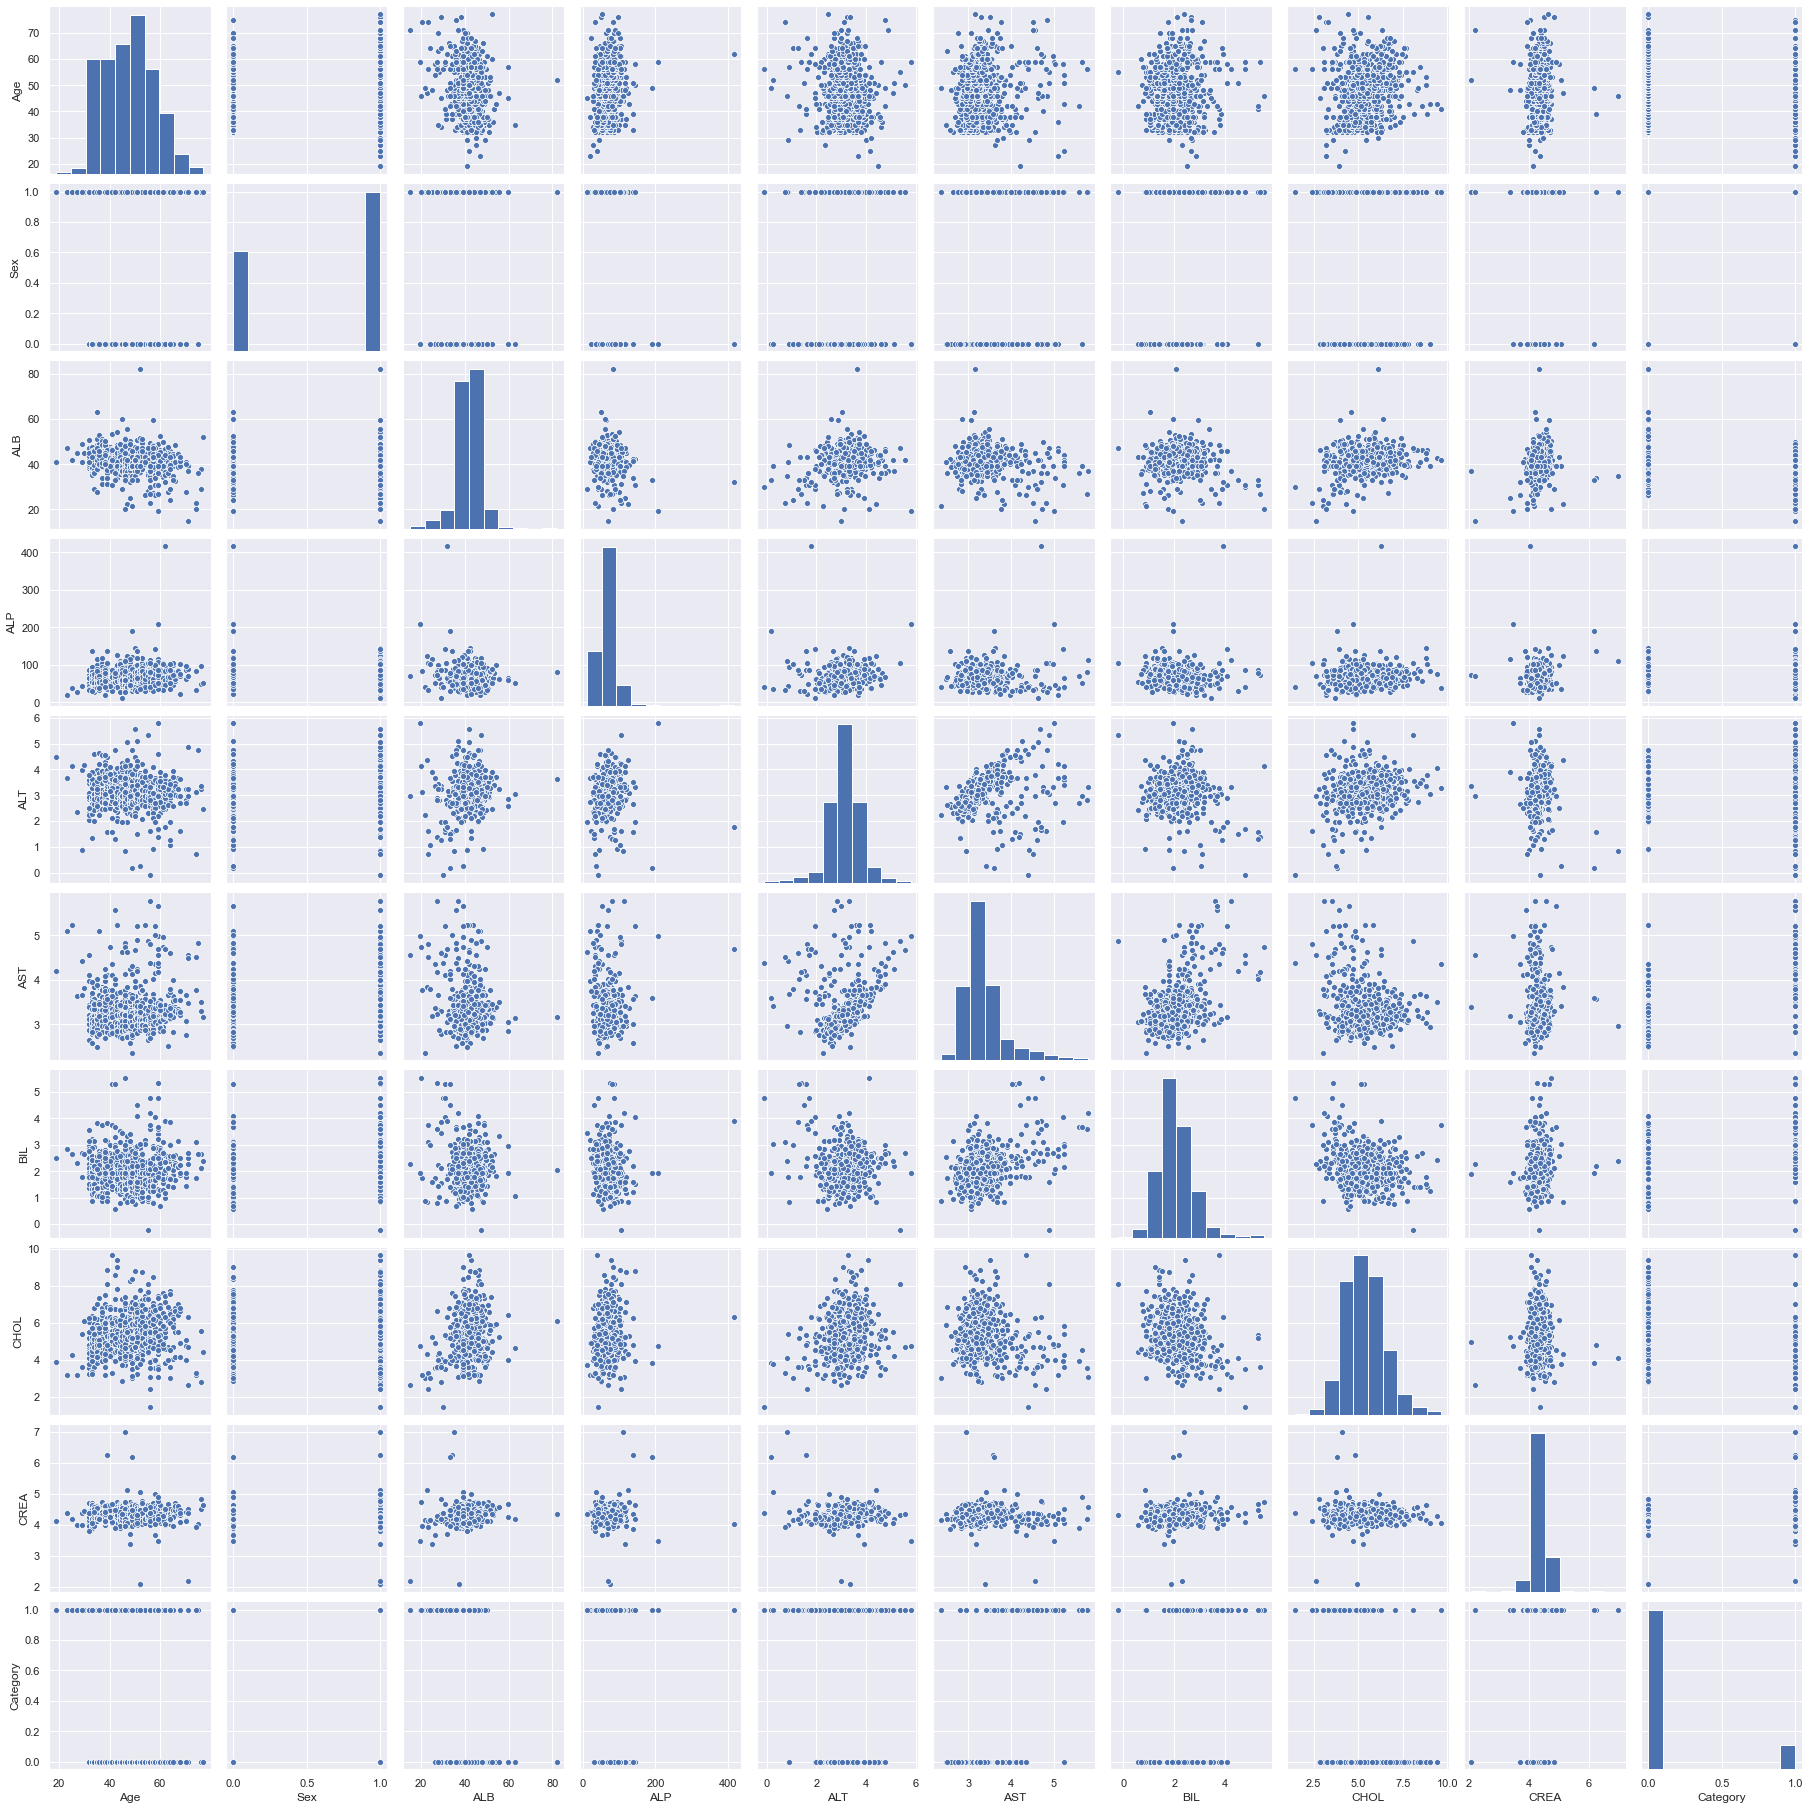

In [8]:
# Features distribution
sns.set()
sns.pairplot(df, height = 2.5)
plt.show();

    У результаті всі ознаки, які приймають небулеві значення, були приведені до нормального розподілу. Далі позбудемося викидів з кількісних ознак.

In [9]:
# Outliers
print('Outliers:')
j=0
for feature in ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHOL", "CREA"]:
    observations=[]
    i=0
    for observation in df[feature]:
        if observation>round(df[feature].mean()+3*df[feature].std(), 1):
            observation=round(df[feature].mean()+3*df[feature].std(), 1)
            i=i+1
        elif observation<round(df[feature].mean()-3*df[feature].std(), 1):
            observation=round(df[feature].mean()-3*df[feature].std(), 1)
            i=i+1
        observations.append(observation)
    print(str(feature)+'\t'+str(i))
    j=j+i
    df[feature]=observations
print('GRAND TOTAL:\t'+str(j))

Outliers:
Age	0
ALB	13
ALP	3
ALT	11
AST	14
BIL	9
CHOL	5
CREA	7
GRAND TOTAL:	62


    Було усунуто 62 викиди з 7 кількісних ознак.

In [10]:
# Descriptive Statistics
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,0.613008,41.622638,67.653601,3.132060,3.359178,2.070175,5.366033,4.344952,0.133333
std,10.055105,0.487458,5.378129,21.124309,0.627839,0.470712,0.656230,1.119590,0.213073,0.340211
min,19.000000,0.000000,24.300000,11.300000,1.100000,2.360854,-0.000000,2.000000,3.500000,0.000000
25%,39.000000,0.000000,38.800000,52.500000,2.797281,3.072693,1.667707,4.610000,4.204693,0.000000
50%,47.000000,1.000000,41.950000,66.200000,3.135494,3.254243,1.987874,5.300000,4.343805,0.000000
75%,54.000000,1.000000,45.200000,80.100000,3.498777,3.493473,2.415914,6.060000,4.477337,0.000000
max,77.000000,1.000000,59.000000,146.400000,5.100000,4.900000,4.200000,8.800000,5.200000,1.000000


    Далі проведемо перевірку наявності відсутніх значень.

In [11]:
# Cheking NaN
nan_by_column=df.isnull().sum()
print(nan_by_column)

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHOL        10
CREA         0
Category     0
dtype: int64


    Відсутні значення були виявлені тільки в якісних змінних, тому замінимо їх середнім значенням.

In [12]:
# Taking care of missing data
from sklearn.impute import SimpleImputer

df[['ALB']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALB']])
df[['ALB']]=round(df[['ALB']], 1)

df[['ALP']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALP']])
df[['ALP']]=round(df[['ALP']], 1)

df[['ALT']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ALT']])
df[['ALT']]=round(df[['ALT']], 1)

df[['CHOL']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['CHOL']])
df[['CHOL']]=round(df[['CHOL']], 1)

In [13]:
# Descriptive Statistics
df.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.613008,41.622602,67.654959,3.133333,3.359178,2.070175,5.366179,4.344952,0.133333
std,10.055105,0.487458,5.373747,20.812367,0.628926,0.470712,0.656230,1.111105,0.213073,0.340211
min,19.000000,0.000000,24.300000,11.300000,1.100000,2.360854,-0.000000,2.000000,3.500000,0.000000
25%,39.000000,0.000000,38.800000,52.950000,2.800000,3.072693,1.667707,4.600000,4.204693,0.000000
50%,47.000000,1.000000,41.900000,66.700000,3.100000,3.254243,1.987874,5.300000,4.343805,0.000000
75%,54.000000,1.000000,45.200000,79.300000,3.500000,3.493473,2.415914,6.050000,4.477337,0.000000
max,77.000000,1.000000,59.000000,146.400000,5.100000,4.900000,4.200000,8.800000,5.200000,1.000000


    Для перевірки класифікаційний якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Навчання моделі буде проводитися відповідно на навчальній вибірці, а для перевірки їх здатності для класифікації буде використано тестову вибірку.

In [14]:
# Splitting the dataset into the Training set and Test set
X=df.iloc[:, 0:9].values
y=df.iloc[:, 9:10].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

    Для задачі класифікації ознаки були прошкальовані за методом MinMax, що привело їх усіх у інтервал [0; 1].

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler().fit(X_train)
X_train=sc_X.transform(X_train)
X_test=sc_X.transform(X_test)

        Далі розглянемо першу з моделей класифікації - логістичну регресію. Для неї спробуємо визначити значущість залежних змінних за допомогою p-значень, аби відкинути незначущі змінни, спростивши таким чином модель, але незначно втративши в її якості.

In [16]:
# Logistic Regression

In [17]:
# Baseline model
import statsmodels.api as sm
lr=sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.109144
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.709     
Dependent Variable: y                AIC:              125.3973  
Date:               2020-10-29 22:26 BIC:              163.1836  
No. Observations:   492              Log-Likelihood:   -53.699   
Df Model:           8                LL-Null:          -184.40   
Df Residuals:       483              LLR p-value:      6.6021e-52
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
x1       -0.4554     1.3729   -0.3317   0.7401    -3.1461    2.2354
x2        1.0142     0.6356    1.5957   0.1106    -0.2315 

    З усіх ознак значущими по p-значенню виявилися тільки 5: ALB, ALT, AST, CHOL і CREA. У подальшому розглядатимемо тільки їх.

In [18]:
# Features selection
opt_columns=[2, 4, 5, 7, 8]
X_train_opt=X_train[:, opt_columns]
X_test_opt=X_test[:, opt_columns]

    Натренуємо модель логістичної регресії і вирахуємо її метрику якості Accuracy, а також матрицю невідповдності.

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
slr=LogisticRegression(random_state=123).fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
# Predicting the Test set results
y_pred_logit=slr.predict(X_test_opt)
logistic_score=slr.score(X_test_opt, y_test)
logistic_score

0.8861788617886179

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
logistic_cm=confusion_matrix(y_test, y_pred_logit)
print(logistic_cm)

[[102   0]
 [ 14   7]]


    Далі розглянемо класифікацію з допомогою методу опорних векторів. Для методу опорних векторів розглянемо моделі з використанням різних ядр (кернелів), виберемо найкращу з них за метрикою Accuracy та розрахуємо для неї матрицю невідповіностей.

In [22]:
# Support Vector Machine (SVM)

In [23]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm1=SVC(kernel='rbf', random_state=123).fit(X_train_opt, y_train)
svm2=SVC(kernel='linear', random_state=123).fit(X_train_opt, y_train)
svm3=SVC(kernel='poly', random_state=123).fit(X_train_opt, y_train)
svm4=SVC(kernel='sigmoid', random_state=123).fit(X_train_opt, y_train)
# svm5=SVC(kernel='precomputed', random_state=123).fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
# Accuracy Scores
svm1_score=svm1.score(X_test_opt, y_test)
svm2_score=svm2.score(X_test_opt, y_test)
svm3_score=svm3.score(X_test_opt, y_test)
svm4_score=svm4.score(X_test_opt, y_test)
svm1_score, svm2_score, svm3_score, svm4_score

(0.9512195121951219,
 0.8943089430894309,
 0.9512195121951219,
 0.8292682926829268)

In [25]:
# Predicting the Test set results
y_pred_svm1=svm1.predict(X_test_opt)
y_pred_svm3=svm3.predict(X_test_opt)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
SVM1_cm=confusion_matrix(y_test, y_pred_svm1)
SVM3_cm=confusion_matrix(y_test, y_pred_svm3)
print(SVM1_cm)
print(SVM3_cm)

[[101   1]
 [  5  16]]
[[101   1]
 [  5  16]]


    Далі розглянемо байєсівську класифікацію.

In [27]:
# Naive Bayes

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(X_train_opt, y_train)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# Predicting the Test set results
y_pred_nb=nb.predict(X_test_opt)
nb_score=nb.score(X_test_opt, y_test)
nb_score

0.9349593495934959

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm=confusion_matrix(y_test, y_pred_nb)
print(nb_cm)

[[101   1]
 [  7  14]]


    Далі розглянемо класифікацію за методом k найближчих сусідів.

In [31]:
# K-Nearest Neighbors (K-NN)

    Для цього методу знайдемо оптимальне число k найближчих сусідів, якому відповідає найменше значення помилки передбачення для тестової вибірки, з усіх цілих чисел з інтервалу [1; 49].

<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was e

<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_opt, y_train)
<ipython-input-32-02c866f532bd>:6: DataConversionWarning: A column-vector y was passed when a 1d array was e

Minimum error:- 0.20285544318857823 at K = 25


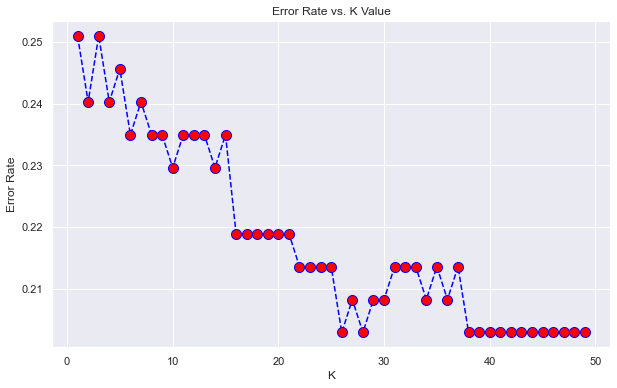

In [32]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,50):
     knn=KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train_opt, y_train)
     pred_i=knn.predict(X_test_opt)
     error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [33]:
# Fitting K-NN to the Training set
knn=KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='minkowski', p=2).fit(X_train_opt, y_train)

<ipython-input-33-874b587b9665>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn=KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)), metric='minkowski', p=2).fit(X_train_opt, y_train)


    Оптимальним числом k для побудови моделі класифікації за методом k найближчих сусідів виявилося 25. Власне для нього й будуємо відповідну модель.

In [34]:
# Predicting the Test set results
y_pred_knn=knn.predict(X_test_opt)
knn_score=knn.score(X_test_opt, y_test)
knn_score

0.8943089430894309

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test, y_pred_knn)
print(knn_cm)

[[102   0]
 [ 13   8]]


    Далі розглянемо класифікацію з використанням дерева рішень. Для цієї моделі знайдемо оптимальне значення параметру max_leaf_nodes серед цілих чисел з інтервалу [2; 20] за критерієм найменшої метрики MSE для тестової вибірки.

In [36]:
# Classification Tree

In [37]:
# Function Max Leaf
def max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train=[]
    mse_test=[]
    for i in n:
        rf=DecisionTreeRegressor(max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' leaves\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax=plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    i=2

2 leaves	0.07717579508892546
None
3 leaves	0.05644450158341231
None
4 leaves	0.06257593659090695
None
5 leaves	0.054924527837194065
None
6 leaves	0.057122968188944516
None
7 leaves	0.06037445610557399
None
8 leaves	0.0574476268372813
None
9 leaves	0.0574476268372813
None
10 leaves	0.059017889935745624
None
11 leaves	0.06155854034224969
None
12 leaves	0.06511545091135537
None
13 leaves	0.06527100093624338
None
14 leaves	0.06483315642174382
None
15 leaves	0.06460732083005456
None
16 leaves	0.06412001077123738
None
17 leaves	0.09680120003997207
None
18 leaves	0.09743951220821771
None
19 leaves	0.09743951220821771
None
20 leaves	0.09761136867567023
None


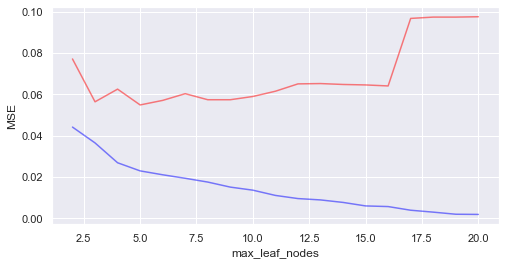

In [38]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, range(2,21))

    Можна побачити, що найменше значення помилки MSE для тестової вибірки спостерігається для max_leaf_nodes=5. Проведемо побудову моделей з цим параметром з різними критеріями оптимізації, виберемо найкращу з них за метрикою Accuracy і побудуємо для неї матрицю невідповідностей.

In [39]:
# Fitting Classification Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
ct1=DecisionTreeClassifier(max_leaf_nodes=5, criterion='entropy', random_state=123).fit(X_train_opt, y_train)
ct2=DecisionTreeClassifier(max_leaf_nodes=5, criterion='gini', random_state=123).fit(X_train_opt, y_train)

In [40]:
# Accuracy Scores
ct1_score=ct1.score(X_test_opt, y_test)
ct2_score=ct2.score(X_test_opt, y_test)
ct1_score, ct2_score

(0.9349593495934959, 0.943089430894309)

In [41]:
# Predicting the Test set results
y_pred_ct2=ct2.predict(X_test_opt)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ct2_cm=confusion_matrix(y_test, y_pred_ct2)
print(ct2_cm)

[[101   1]
 [  6  15]]


    Далі розглянемо класифікацію за допомогою методу випадкового лісу. Для початку виберемо оптимальне число дерев у випадковому лісу з інтервалів від 1 до 10 по мінімальному значенню метрики MSE для тестової вибірки.

In [43]:
# Random Forest Classification

In [44]:
def rf_best_n_estimator(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train=[]
    mse_test=[]
    for i in n:
        rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' trees\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

1 trees	0.10569105691056911
None
2 trees	0.0975609756097561
None
3 trees	0.08130081300813008
None
4 trees	0.07317073170731707
None
5 trees	0.056910569105691054

<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)



None
6 trees	0.06504065040650407
None
7 trees	0.04878048780487805
None
8 trees	0.056910569105691054
None


<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-44-9f59a598bf70>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestClassifier(n_estimators=i, random_state=123).fit(X_train_opt, y_train)


9 trees	0.04878048780487805
None
10 trees	0.04878048780487805
None


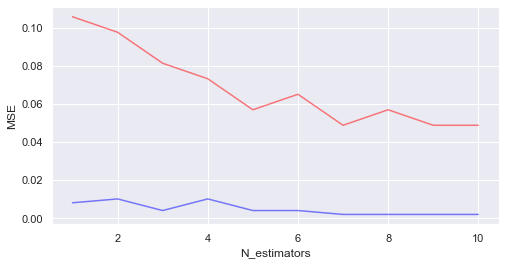

In [45]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier  
rf_best_n_estimator(X_train_opt, X_test_opt, y_train, y_test, range(1,11))

    Оптимальним число дерев у випадковому лісі з інтервалу виявилося 7. Для 7 дерев знайдемо оптимальне значення параметра rf_max_leaf_nodes.

In [46]:
def rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train_opt)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test_opt)))
        print(print(str(i)+' leaves\t'+str(mean_squared_error(y_test, rf.predict(X_test_opt)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


2 leaves	0.11382113821138211
None
3 leaves	0.08943089430894309
None
4 leaves	0.08130081300813008
None
5 leaves	0.08130081300813008
None
6 leaves	0.06504065040650407
None
7 leaves	0.06504065040650407

<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)



None
8 leaves	0.06504065040650407
None
9 leaves	0.06504065040650407
None


<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)
<ipython-input-46-208d4ea7a83a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=7, max_leaf_nodes=i, random_state=123).fit(X_train_opt, y_train)


10 leaves	0.06504065040650407
None


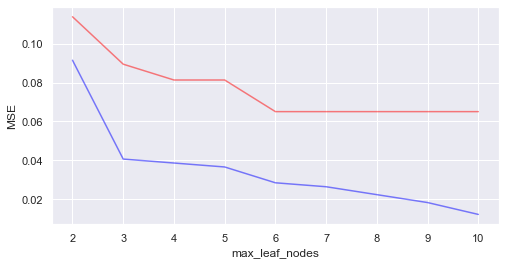

In [47]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train_opt, X_test_opt, y_train, y_test, range(2, 11))

    Оптимальним числом листків у випадковому лісі з 7 дерев виявилося 6. Проведемо побудову моделей з цими параметрами з різними критеріями оптимізації, виберемо найкращу з них за метрикою Accuracy і побудуємо для неї матрицю невідповідностей.

In [64]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators = 7, max_leaf_nodes = 6, criterion='gini', random_state = 123).fit(X_train_opt, y_train)
rf2 = RandomForestClassifier(n_estimators = 7, max_leaf_nodes = 6, criterion='entropy', random_state = 123).fit(X_train_opt, y_train)

<ipython-input-64-a1f3335594dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1 = RandomForestClassifier(n_estimators = 7, max_leaf_nodes = 6, criterion='gini', random_state = 123).fit(X_train_opt, y_train)
<ipython-input-64-a1f3335594dc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestClassifier(n_estimators = 7, max_leaf_nodes = 6, criterion='entropy', random_state = 123).fit(X_train_opt, y_train)


In [65]:
# Accuracy Scores
rf1_score=rf1.score(X_test_opt, y_test)
rf2_score=rf2.score(X_test_opt, y_test)
rf1_score, rf2_score

(0.9349593495934959, 0.943089430894309)

In [66]:
# Predicting the Test set results
y_pred_rf2=rf2.predict(X_test_opt)

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf2_cm=confusion_matrix(y_test, y_pred_rf2)
print(rf2_cm)

[[101   1]
 [  6  15]]


    Далі розглянемо використання нейронних мереж для класифікації. У такому випадку варто використовувати нейронні мережі, що звужуються.

In [52]:
# Classification Neural Network

    Першою розглянемо нейронну мережу з архітектурою 5-3-1 і функціями активації relu і sigmoid. Для такої функції мережі навчання партіями по 10 протягом 100 епох. Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [53]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

In [54]:
# Initialising the ANN
cnn1=Sequential()

# Adding the input layer
cnn1.add(Input(shape=(5,)))

# Adding the hidden layer
cnn1.add(Dense(3, activation='relu'))

# Adding the output layer
cnn1.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# Fitting the ANN to the Training set
cnn1.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.2663
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.8862
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.8821
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.8760
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6180 - accuracy: 0.8760
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.8760
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 0.8760
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5759 - accuracy: 0.8760
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.8760
Epoch 10/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5506 - accuracy: 0.8760
Epoch 11/

50/50 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9614
Epoch 83/100
50/50 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.96 - 0s 4ms/step - loss: 0.1691 - accuracy: 0.9593
Epoch 84/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9634
Epoch 85/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1666 - accuracy: 0.9654
Epoch 86/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9634
Epoch 87/100
50/50 [==============================] - 0s 6ms/step - loss: 0.1637 - accuracy: 0.9634
Epoch 88/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1626 - accuracy: 0.9634
Epoch 89/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9634
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9634
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - los

In [56]:
# Predicting the Test set results
y_pred_cnn1=cnn1.predict(X_test_opt)
y_pred_cnn1=(y_pred_cnn1>0.5)

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn1_cm=confusion_matrix(y_test, y_pred_cnn1)
print(cnn1_cm)

[[101   1]
 [ 11  10]]


In [58]:
# Accuracy Score
cnn1_score=(cnn1_cm[0, 0]+cnn1_cm[1, 1])/(cnn1_cm[0, 0]+cnn1_cm[1, 1]+cnn1_cm[0, 1]+cnn1_cm[1, 0])
cnn1_score

0.9024390243902439

        Другою розглянемо нейронну мережу з архітектурою 5-3-1 і функціями активації tanh і sigmoid. Для такої функції мережі навчання партіями по 10 протягом 100 епох. Для побудованої та навченної нейронної мережі оцінимо класи автомобілів у тестовій вибірці, побудуємо матрицю невідповідностей та з неї порахуємо метрику точності Accuracy.

In [59]:
# Initialising the ANN
cnn2=Sequential()

# Adding the input layer
cnn2.add(Input(shape=(5,)))

# Adding the hidden layer
cnn2.add(Dense(3, activation='tanh'))

# Adding the output layer
cnn2.add(Dense(1, activation='sigmoid'))

# Compiling the ANN
cnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
# Fitting the ANN to the Training set
cnn2.fit(X_train_opt, y_train, batch_size=10, epochs=100)

Epoch 1/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.7480
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.8760
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.8760
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.8760
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4607 - accuracy: 0.8760
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.8760
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4087 - accuracy: 0.8760
Epoch 8/100
50/50 [==============================] - 0s 7ms/step - loss: 0.3942 - accuracy: 0.8760
Epoch 9/100
50/50 [==============================] - 0s 7ms/step - loss: 0.3841 - accuracy: 0.8760
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 0.3767 - accuracy: 0.8760
Epoch 11/

50/50 [==============================] - 0s 3ms/step - loss: 0.1453 - accuracy: 0.9431
Epoch 83/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9451
Epoch 84/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1435 - accuracy: 0.9451
Epoch 85/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9431
Epoch 86/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.9451
Epoch 87/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9472
Epoch 88/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.9492
Epoch 89/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1390 - accuracy: 0.9492
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.9492
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9512
Epoch 92/100


In [61]:
# Predicting the Test set results
y_pred_cnn2=cnn2.predict(X_test_opt)
y_pred_cnn2=(y_pred_cnn2>0.5)

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cnn2_cm=confusion_matrix(y_test, y_pred_cnn2)
print(cnn2_cm)

[[102   0]
 [ 10  11]]


In [63]:
# Accuracy Score
cnn2_score=(cnn2_cm[0, 0]+cnn2_cm[1, 1])/(cnn2_cm[0, 0]+cnn2_cm[1, 1]+cnn2_cm[0, 1]+cnn2_cm[1, 0])
cnn2_score

0.9186991869918699

    За метрикою Accuracy кращою є друга нейронна мережа. Порівняємо її з найкращими моделями класифікації інших типів.

In [70]:
# Model Comparison
print('Logistic Regression:')
print('Accuracy='+str(logistic_score))
print('Confusion Matrix:\n'+str(logistic_cm)+'\n')
print('Support Vector Machine (kernel=rbf):')
print('Accuracy='+str(svm1_score))
print('Confusion Matrix:\n'+str(SVM1_cm)+'\n')
print('Support Vector Machine (kernel=poly):')
print('Accuracy='+str(svm3_score))
print('Confusion Matrix:\n'+str(SVM3_cm)+'\n')
print('Naive Bayes:')
print('Accuracy='+str(nb_score))
print('Confusion Matrix:\n'+str(nb_cm)+'\n')
print('K-Nearest Neighbors (25 neighbors):')
print('Accuracy='+str(knn_score))
print('Confusion Matrix:\n'+str(knn_cm)+'\n')
print('Classification Tree (5 leaves, criterion=gini):')
print('Accuracy='+str(ct2_score))
print('Confusion Matrix:\n'+str(ct2_cm)+'\n')
print('Random Forest(7 trees, 6 leaves, criterion=entropy):')
print('Accuracy='+str(rf2_score))
print('Confusion Matrix:\n'+str(rf2_cm)+'\n')
print('Classification Neural Network (5-3-1, activation functions - tanh and sigmoid):')
print('Accuracy='+str(cnn2_score))
print('Confusion Matrix:\n'+str(cnn2_cm))

Logistic Regression:
Accuracy=0.8861788617886179
Confusion Matrix:
[[102   0]
 [ 14   7]]

Support Vector Machine (kernel=rbf):
Accuracy=0.9512195121951219
Confusion Matrix:
[[101   1]
 [  5  16]]

Support Vector Machine (kernel=poly):
Accuracy=0.9512195121951219
Confusion Matrix:
[[101   1]
 [  5  16]]

Naive Bayes:
Accuracy=0.9349593495934959
Confusion Matrix:
[[101   1]
 [  7  14]]

K-Nearest Neighbors (25 neighbors):
Accuracy=0.8943089430894309
Confusion Matrix:
[[102   0]
 [ 13   8]]

Classification Tree (5 leaves, criterion=gini):
Accuracy=0.943089430894309
Confusion Matrix:
[[101   1]
 [  6  15]]

Random Forest(7 trees, 6 leaves, criterion=entropy):
Accuracy=0.943089430894309
Confusion Matrix:
[[101   1]
 [  6  15]]

Classification Neural Network (5-3-1, activation functions - tanh and sigmoid):
Accuracy=0.9186991869918699
Confusion Matrix:
[[102   0]
 [ 10  11]]


    Оптимальними моделями для класифікації виявилися моделі з використаннням методу опорних векторів, оптимізовані з використанням ядер rbf і poly: їхня точність склала 95%, хоча в інших моделей вона не значно нижча.
    Пророблена робота показує можливість вирішення задачі класифікації задачі класифікації з допомогою різних методів і моделей, які хоч і мають доволі відмінні результати, проте цілком можливо, що з множини розглянутих моделей можна буде виокремити ті, які мають достатню високу точнісь, що дозволяє використовувати їх для ефективної класифікації.